In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV,cross_val_score, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')




In [2]:
school_df = pd.read_csv('updated_data.csv', index_col=0)

X = school_df.drop('Target_encoded', axis=1)
y = school_df['Target_encoded']

In [3]:
X.describe()

,Application mode,Application order,Course,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Debtor,Tuition fees up to date,Gender,Scholarship holder,Inflation rate,Total Curricular units (grade),Total Curricular units (approved),Total Curricular units (without evaluations)
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,5.886980,1.727396,8.899186,1.531420,11.322107,15.455244,6.317812,6.819168,0.113698,0.880651,0.351718,0.248418,0.461792,0.833861,0.521166,0.031149
std,5.298964,1.311632,4.331792,3.963707,9.026251,11.044800,3.997828,4.856692,0.317480,0.324235,0.477560,0.432144,0.345221,0.358558,0.277252,0.126959
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,5.000000,0.000000,1.000000,2.000000,4.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.169534,1.000000,0.433393,0.000000
50%,7.000000,1.000000,9.000000,0.000000,12.000000,13.000000,5.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.565708,1.000000,0.645711,0.000000
75%,11.000000,2.000000,12.000000,0.000000,21.000000,26.000000,9.000000,9.000000,0.000000,1.000000,1.000000,0.000000,0.827711,1.000000,0.690696,0.000000
max,17.000000,7.000000,16.000000,16.000000,28.000000,33.000000,31.000000,45.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

## Logistic Regression

In [5]:
logreg = LogisticRegression()

In [6]:
# Performing cross-validation
scores = cross_val_score(logreg, X_train, y_train, cv=10)  # 10-fold cross-validation

# Printing the scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

Cross-validation scores: [0.85310734 0.86158192 0.85028249 0.85310734 0.87288136 0.84463277
 0.8220339  0.86440678 0.85310734 0.86685552]
Mean cross-validation score: 0.8541996767017173


In [7]:
logreg.fit(X_train,y_train)
train_pred = logreg.predict(X_train)
test_pred = logreg.predict(X_test)
logreg_pred_proba=logreg.predict_proba(X_test)[:,1]
print('training accuracy: ',accuracy_score(train_pred,y_train))
print('testing accuracy: ',accuracy_score(test_pred,y_test))

training accuracy:  0.8556089290760102
testing accuracy:  0.8779661016949153


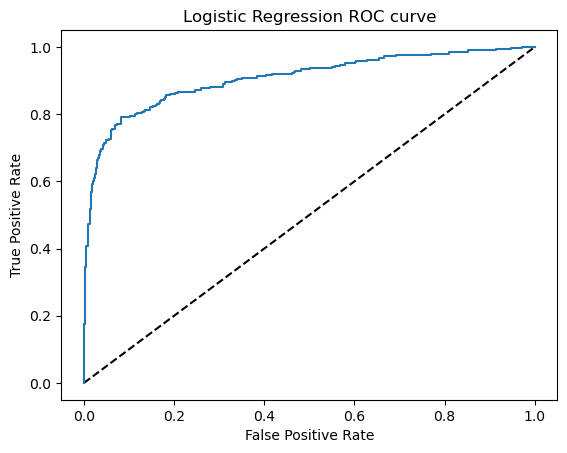

In [8]:
# Plotting the roc_curve
fpr,tpr,threshold=roc_curve(y_test,logreg_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.show()

In [9]:
# Calculating the area under the curve
roc_auc_score(y_test,logreg_pred_proba)

0.9055095966815871

In [10]:
print("Confusion matrix:\n", confusion_matrix(y_test, test_pred))
print("Classification report:\n", classification_report(y_test, test_pred))

Confusion matrix:
 [[574  27]
 [ 81 203]]
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.91       601
           1       0.88      0.71      0.79       284

    accuracy                           0.88       885
   macro avg       0.88      0.83      0.85       885
weighted avg       0.88      0.88      0.87       885



In [11]:
def plot_learning_curve(model):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01,1,50), verbose=1)
   
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label="Training scores")
    plt.plot(train_sizes, test_mean, label="Testing scores")

    plt.title(f'{model} Learning curve')
    plt.xlabel('Training size')
    plt.ylabel('Accuracy score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()
    

[learning_curve] Training set sizes: [  31   96  160  224  289  353  417  482  546  611  675  739  804  868
  932  997 1061 1125 1190 1254 1318 1383 1447 1511 1576 1640 1704 1769
 1833 1898 1962 2026 2091 2155 2219 2284 2348 2412 2477 2541 2605 2670
 2734 2798 2863 2927 2991 3056 3120 3185]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   22.7s finished


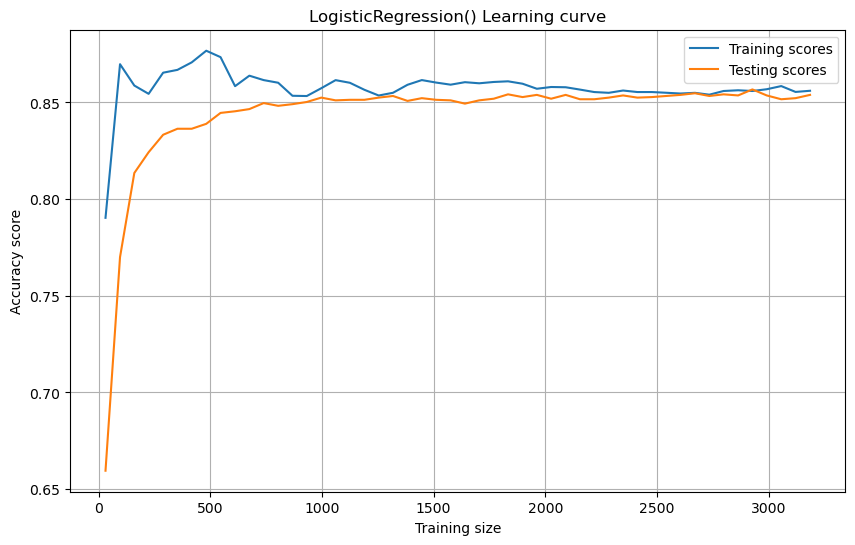

In [12]:
plot_learning_curve(logreg)

## Traditional Machine Learning Models  
1. Decision Trees
2. Random Forests
3. Support Vector Machines
4. Gradient Boosting Machines (e.g., XGBmances

## Decision Tree Classifier

In [13]:
dt = DecisionTreeClassifier()

In [14]:
# Performing cross-validation
dt_scores = cross_val_score(dt, X_train, y_train, cv=10)  # 10-fold cross-validation

# Printing the scores
print("Cross-validation scores:", dt_scores)
print("Mean cross-validation score:", np.mean(dt_scores))

Cross-validation scores: [0.84180791 0.77683616 0.82768362 0.77683616 0.8079096  0.81638418
 0.75988701 0.78813559 0.79943503 0.81303116]
Mean cross-validation score: 0.8007946415710375


In [15]:
dt.fit(X_train,y_train)
dt_train_pred = dt.predict(X_train)
dt_test_pred = dt.predict(X_test)
dt_pred_proba=dt.predict_proba(X_test)[:,1]
print('training accuracy: ',accuracy_score(dt_train_pred,y_train))
print('testing accuracy: ',accuracy_score(dt_test_pred,y_test))

training accuracy:  0.9994348686069511
testing accuracy:  0.7887005649717514


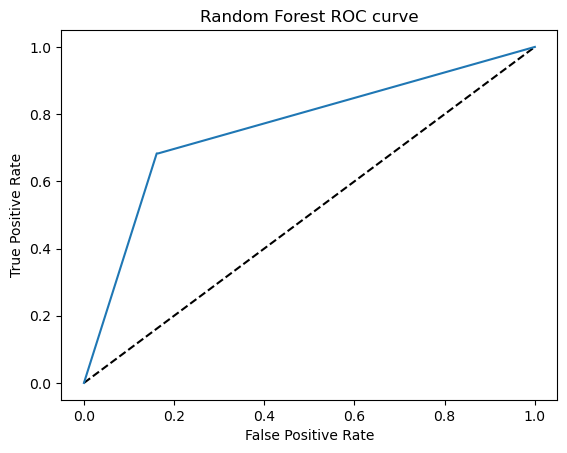

In [16]:
# Plotting the roc_curve
fpr,tpr,threshold=roc_curve(y_test,dt_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve')
plt.show()

In [17]:
# Calculating the area under the curve
roc_auc_score(y_test,dt_pred_proba)

0.7603231703030161

In [18]:
print("Confusion matrix:\n", confusion_matrix(y_test, dt_test_pred))
print("Classification report:\n", classification_report(y_test, dt_test_pred))

Confusion matrix:
 [[504  97]
 [ 90 194]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       601
           1       0.67      0.68      0.67       284

    accuracy                           0.79       885
   macro avg       0.76      0.76      0.76       885
weighted avg       0.79      0.79      0.79       885



[learning_curve] Training set sizes: [  31   96  160  224  289  353  417  482  546  611  675  739  804  868
  932  997 1061 1125 1190 1254 1318 1383 1447 1511 1576 1640 1704 1769
 1833 1898 1962 2026 2091 2155 2219 2284 2348 2412 2477 2541 2605 2670
 2734 2798 2863 2927 2991 3056 3120 3185]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.0s finished


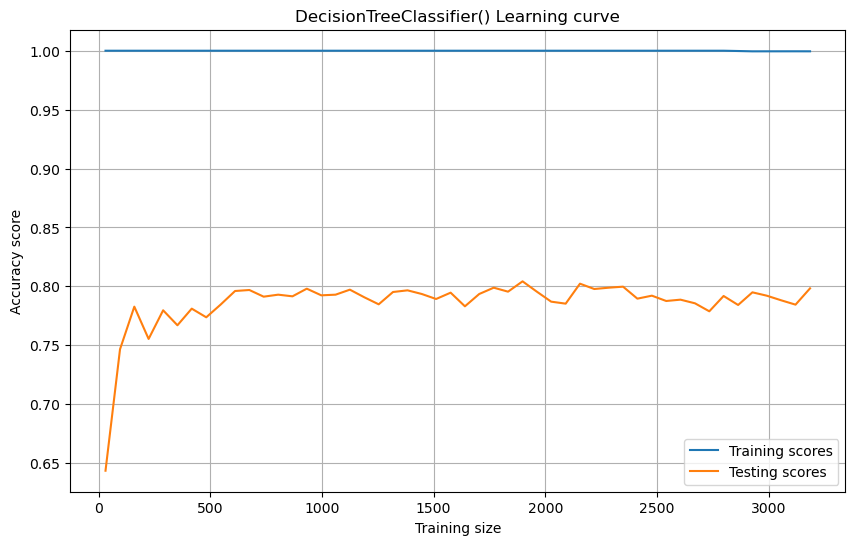

In [19]:
plot_learning_curve(dt)

## Support Vector Machine

In [20]:
svm = SVC()

In [21]:
# Performing cross-validation
svm_scores = cross_val_score(svm, X_train, y_train, cv=10)  # 10-fold cross-validation

# Printing the scores
print("Cross-validation scores:", svm_scores)
print("Mean cross-validation score:", np.mean(svm_scores))

Cross-validation scores: [0.76836158 0.75141243 0.75423729 0.74858757 0.75141243 0.75141243
 0.76553672 0.75706215 0.72881356 0.76487252]
Mean cross-validation score: 0.754170867943855


In [22]:
svm.fit(X_train,y_train)
svm_train_pred = svm.predict(X_train)
svm_test_pred = svm.predict(X_test)
print('training accuracy: ',accuracy_score(svm_train_pred,y_train))
print('testing accuracy: ',accuracy_score(svm_test_pred,y_test))

training accuracy:  0.7697089573325798
testing accuracy:  0.7887005649717514


In [23]:
print("Confusion matrix:\n", confusion_matrix(y_test, svm_test_pred))
print("Classification report:\n", classification_report(y_test, svm_test_pred))

Confusion matrix:
 [[599   2]
 [185  99]]
Classification report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86       601
           1       0.98      0.35      0.51       284

    accuracy                           0.79       885
   macro avg       0.87      0.67      0.69       885
weighted avg       0.83      0.79      0.75       885



[learning_curve] Training set sizes: [  31   96  160  224  289  353  417  482  546  611  675  739  804  868
  932  997 1061 1125 1190 1254 1318 1383 1447 1511 1576 1640 1704 1769
 1833 1898 1962 2026 2091 2155 2219 2284 2348 2412 2477 2541 2605 2670
 2734 2798 2863 2927 2991 3056 3120 3185]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.2min finished


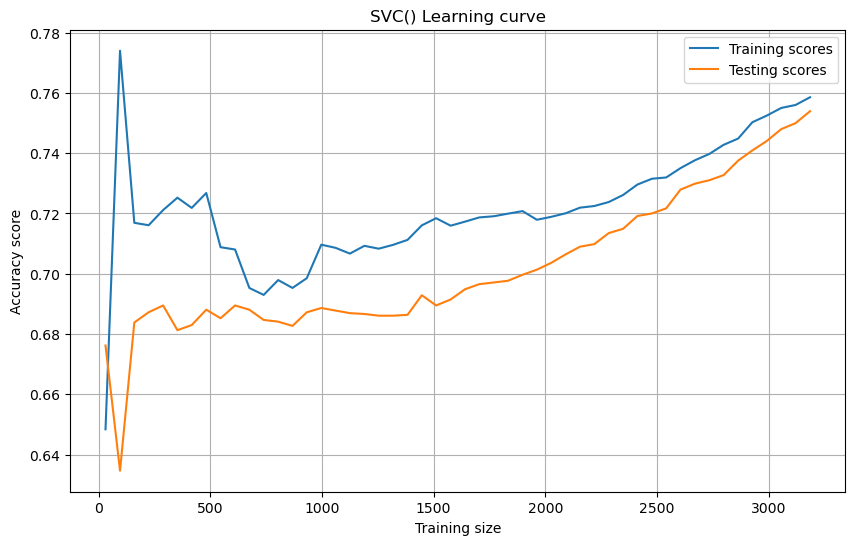

In [24]:
plot_learning_curve(svm)

## Random Forest Classifier

In [25]:
rf = RandomForestClassifier()

In [26]:
# Performing cross-validation
rf_scores = cross_val_score(rf, X_train, y_train, cv=10)  # 10-fold cross-validation

# Printing the scores
print("Cross-validation scores:", rf_scores)
print("Mean cross-validation score:", np.mean(rf_scores))

Cross-validation scores: [0.87570621 0.86723164 0.86440678 0.85028249 0.8700565  0.87570621
 0.83898305 0.88700565 0.86158192 0.87252125]
Mean cross-validation score: 0.8663481698436325


In [27]:
rf.fit(X_train,y_train)
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)
rf_pred_proba=rf.predict_proba(X_test)[:,1]
print('training accuracy: ',accuracy_score(rf_train_pred,y_train))
print('testing accuracy: ',accuracy_score(rf_test_pred,y_test))

training accuracy:  0.9991523029104267
testing accuracy:  0.8711864406779661


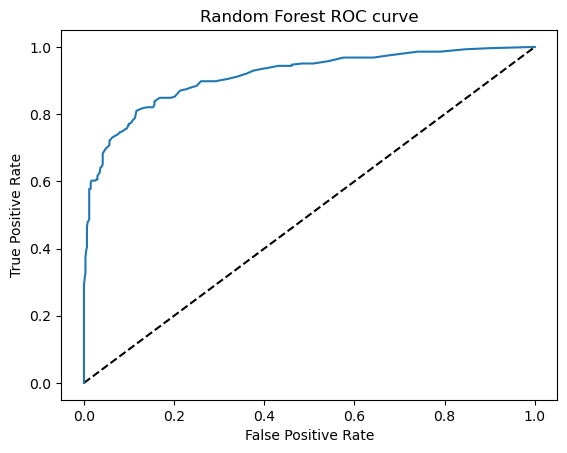

In [28]:
# Plotting the roc_curve
fpr,tpr,threshold=roc_curve(y_test,rf_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve')
plt.show()

In [29]:
# Calculating the area under the curve
roc_auc_score(y_test,rf_pred_proba)

0.9136445126666823

In [30]:
print("Confusion matrix:\n", confusion_matrix(y_test, rf_test_pred))
print("Classification report:\n", classification_report(y_test, rf_test_pred))

Confusion matrix:
 [[564  37]
 [ 77 207]]
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       601
           1       0.85      0.73      0.78       284

    accuracy                           0.87       885
   macro avg       0.86      0.83      0.85       885
weighted avg       0.87      0.87      0.87       885



[learning_curve] Training set sizes: [  31   96  160  224  289  353  417  482  546  611  675  739  804  868
  932  997 1061 1125 1190 1254 1318 1383 1447 1511 1576 1640 1704 1769
 1833 1898 1962 2026 2091 2155 2219 2284 2348 2412 2477 2541 2605 2670
 2734 2798 2863 2927 2991 3056 3120 3185]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.2min finished


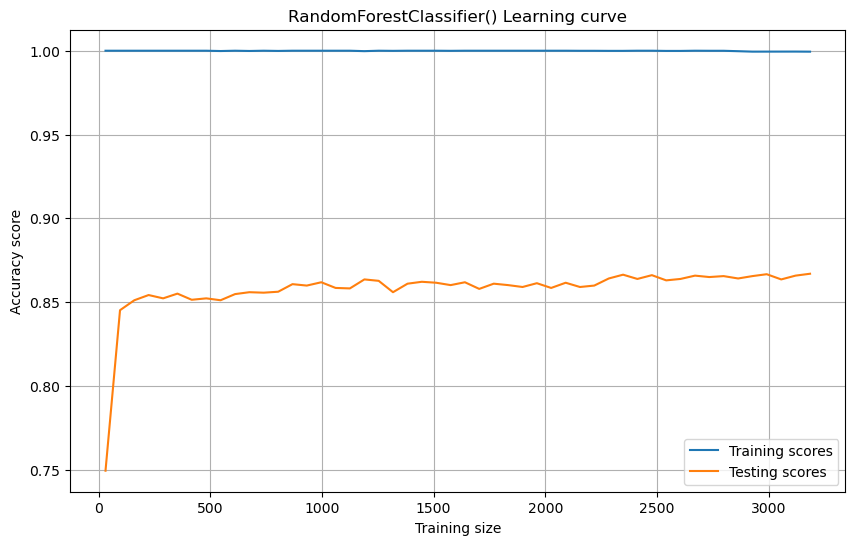

In [31]:
plot_learning_curve(rf)

## Gradient Boosting Classifier

In [32]:
gbt = GradientBoostingClassifier()

In [33]:
# Performing cross-validation
gbt_scores = cross_val_score(gbt, X_train, y_train, cv=10)  # 10-fold cross-validation

# Printing the scores
print("Cross-validation scores:", gbt_scores)
print("Mean cross-validation score:", np.mean(gbt_scores))

Cross-validation scores: [0.87570621 0.86723164 0.8559322  0.85310734 0.87853107 0.87570621
 0.85310734 0.88983051 0.86440678 0.88101983]
Mean cross-validation score: 0.8694579152062227


In [34]:
gbt.fit(X_train,y_train)
gbt_train_pred = gbt.predict(X_train)
gbt_test_pred = gbt.predict(X_test)
gbt_pred_proba=gbt.predict_proba(X_test)[:,1]
print('training accuracy: ',accuracy_score(gbt_train_pred,y_train))
print('testing accuracy: ',accuracy_score(gbt_test_pred,y_test))

training accuracy:  0.8886691155693699
testing accuracy:  0.8700564971751412


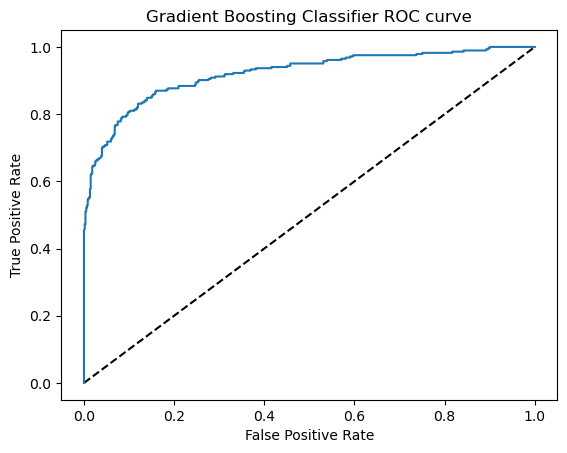

In [35]:
# Plotting the roc_curve
fpr,tpr,threshold=roc_curve(y_test,gbt_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier ROC curve')
plt.show()

In [36]:
# Calculating the area under the curve
roc_auc_score(y_test,gbt_pred_proba)

0.9209181879965317

In [37]:
print("Confusion matrix:\n", confusion_matrix(y_test, gbt_test_pred))
print("Classification report:\n", classification_report(y_test, gbt_test_pred))

Confusion matrix:
 [[561  40]
 [ 75 209]]
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       601
           1       0.84      0.74      0.78       284

    accuracy                           0.87       885
   macro avg       0.86      0.83      0.85       885
weighted avg       0.87      0.87      0.87       885



[learning_curve] Training set sizes: [  31   96  160  224  289  353  417  482  546  611  675  739  804  868
  932  997 1061 1125 1190 1254 1318 1383 1447 1511 1576 1640 1704 1769
 1833 1898 1962 2026 2091 2155 2219 2284 2348 2412 2477 2541 2605 2670
 2734 2798 2863 2927 2991 3056 3120 3185]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.3min finished


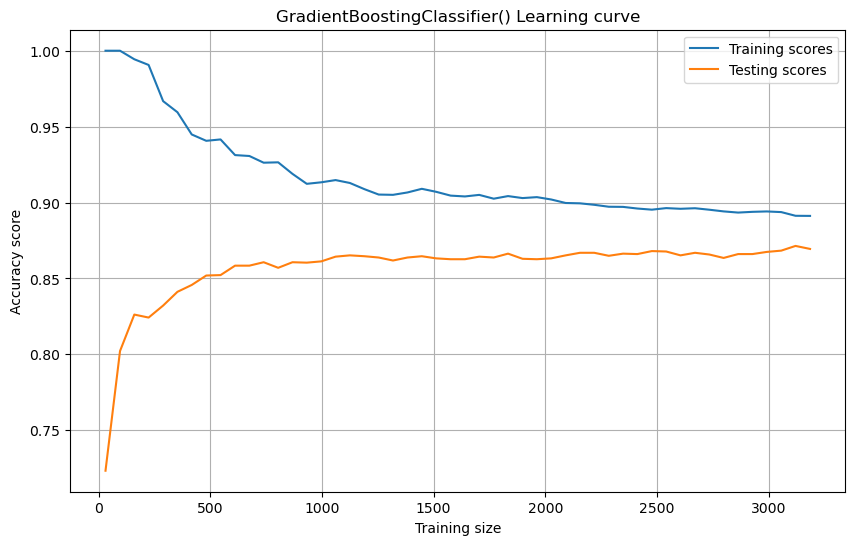

In [38]:
plot_learning_curve(gbt)

## Deep Learning Models 
1.  Design and implement a neural network architecture2. • Train the neural network using TensorFlow or PyTorc3. 
• Experiment with different architectures (e.g., number of layers, neurons)


In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import CrossEntropyLoss
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

In [43]:
# Create a model class that inherits the nn.Module

class Model(nn.Module):
    def __init__(self, in_features=4, h1=16, h2=10, output_features=2):
        super().__init__()   # Instantiate our nn.Module
        self.fc1=nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out= nn.Linear(h2,output_features)

    def forward(self, x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x= self.out(x)

        return x

In [44]:
# Pick a random seed for randomization
torch.manual_seed(41)

# Create an instance of model
model = Model()

In [93]:
import pickle
with open('logisticRegression_model', 'wb' ) as LR:
    pickle.dump(logreg,LR)

with open('RandomForestClassifier_model', 'wb' ) as RFC:
    pickle.dump(rf,RFC)

with open('DecisionTreeClassifier_model', 'wb' ) as DTC:
    pickle.dump(dt,DTC)

with open('SVM_model', 'wb' ) as SVM:
    pickle.dump(svm,SVM)

with open('GradientBoostClassifier_model', 'wb' ) as GBC:
    pickle.dump(gbt,GBC)